In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_excel('Online retail.xlsx', header=None)
df.head()

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [3]:
# Preprocessing: Convert single-column transaction data into a structured format
df.columns = ['Transaction']
df.dropna(inplace=True)
df['Transaction'] = df['Transaction'].apply(lambda x: x.split(','))

In [4]:
# Create a one-hot encoded DataFrame
unique_items = sorted(set(item.strip() for transaction in df['Transaction'] for item in transaction))
basket = pd.DataFrame(0, index=range(len(df)), columns=unique_items)

for i, transaction in enumerate(df['Transaction']):
    for item in transaction:
        basket.at[i, item.strip()] = 1

In [5]:
# Apply the Apriori algorithm
min_support = 0.01  # Adjust based on dataset size
frequent_itemsets = apriori(basket, min_support=min_support, use_colnames=True)

# Generate association rules
min_confidence = 0.2  # Adjust threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence,num_itemsets='int')

# Filter and sort rules by lift
rules = rules[rules['lift'] > 1].sort_values('lift', ascending=False)

In [6]:
# Display top 10 association rules
print("Top 10 Association Rules:\n", rules.head(10))

Top 10 Association Rules:
                             antecedents          consequents  \
75                      (herb & pepper)        (ground beef)   
153          (mineral water, spaghetti)        (ground beef)   
69                           (tomatoes)  (frozen vegetables)   
67                             (shrimp)  (frozen vegetables)   
143               (milk, mineral water)  (frozen vegetables)   
152        (mineral water, ground beef)          (spaghetti)   
145  (mineral water, frozen vegetables)               (milk)   
149               (milk, mineral water)        (ground beef)   
90                               (soup)               (milk)   
80                          (spaghetti)        (ground beef)   

     antecedent support  consequent support   support  confidence      lift  \
75             0.049460            0.098254  0.015998    0.323450  3.291994   
153            0.059725            0.098254  0.017064    0.285714  2.907928   
69             0.068391        

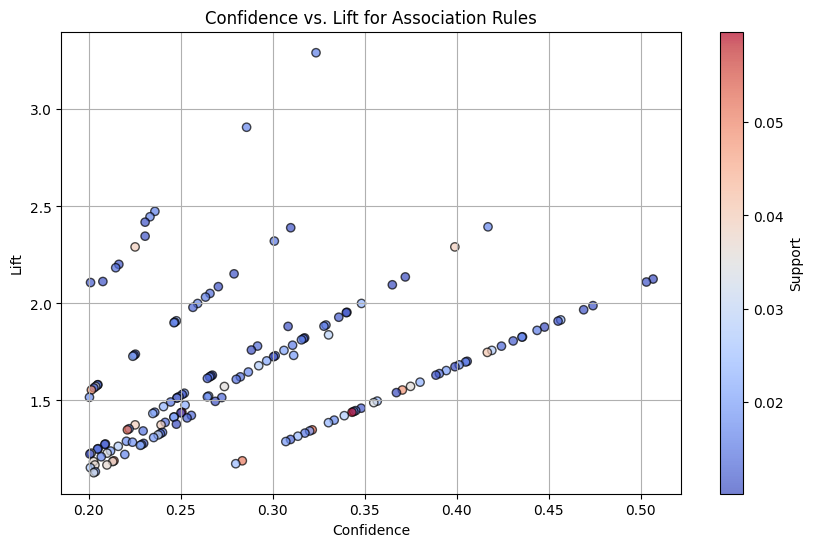

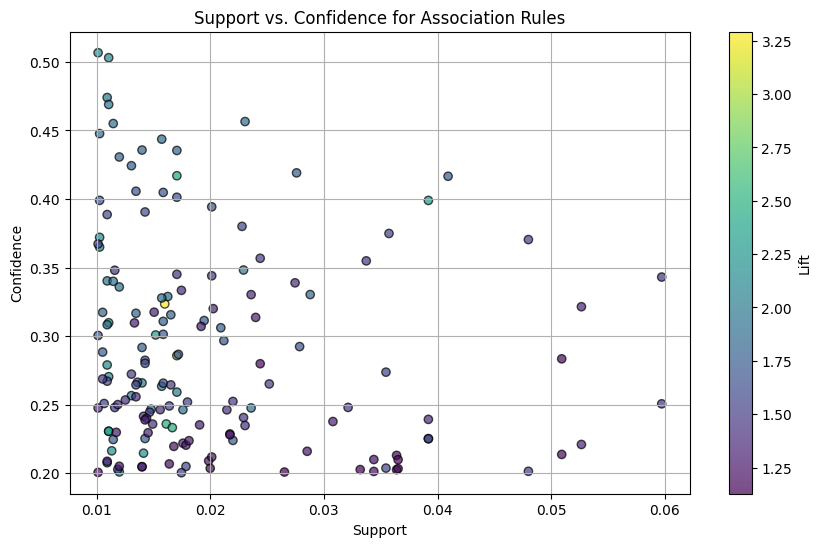

In [7]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(rules['confidence'], rules['lift'], c=rules['support'], cmap='coolwarm', alpha=0.7, edgecolors='k')
plt.colorbar(label='Support')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Confidence vs. Lift for Association Rules')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis', alpha=0.7, edgecolors='k')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence for Association Rules')
plt.grid(True)
plt.show()

## Questions

## 1. What is lift and why is it important in Association rules?
   - Lift measures how much more likely two items are to be bought together than if they were independent.  
   - It is important because it helps identify strong and meaningful associations. A lift > 1 indicates a positive correlation, while a lift < 1 suggests a negative or no relationship.

## 2. What is support and confidence? How do you calculate them?
- Support: The proportion of transactions containing a particular itemset.
 - Support = Transactions containing itemset / Total transactions
	
    
- Confidence: The probability that if item A is bought, item B is also bought.
 - Confidence = Transactions containing both A and B / Transactions containing A
 

## 3. What are some limitations or challenges of Association rule mining?
   - Large computational complexity: Processing large datasets can be slow.  
   - Choosing appropriate thresholds: Setting support and confidence values incorrectly can lead to too many or too few rules.  
   - Interpreting results: Some associations may not be meaningful in real-world scenarios.  
   - Handling rare itemsets: Items with low frequency might get ignored even if they are valuable.
